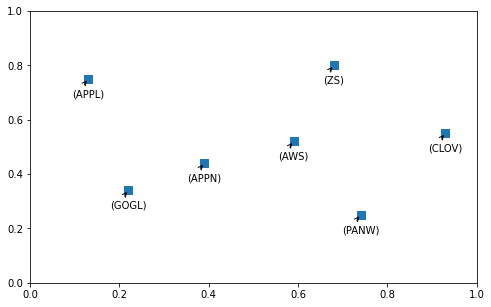

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

x_coords = [0.13, 0.22, 0.39, 0.59, 0.68, 0.74, 0.93]
y_coords = [0.75, 0.34, 0.44, 0.52, 0.80, 0.25, 0.55]
labels = ['APPL', 'GOGL', 'APPN', 'AWS', 'ZS', 'PANW', 'CLOV']

fig = plt.figure(figsize=(8,5))
plt.scatter(x_coords, y_coords, marker='s', s=50)

for label,x, y in zip(labels,x_coords, y_coords):
    plt.annotate(
        '(%s)' %(label), 
        xy=(x, y), 
        xytext=(0, -10),
        textcoords='offset points', 
        ha='center', 
        va='top',
        arrowprops = dict(arrowstyle='->',connectionstyle = 'arc3,rad=-0.5'))

plt.xlim([0,1])
plt.ylim([0,1])
plt.show()

# Importing online financial data in the JSON format

In [32]:
d = {'Date_x': ['2015-01-31', '2015-01-31', '2015-01-31'], 'local_price': [28.00, 5.30,13.50], 'dollar_price': [3.252033, 4.318705,5.206827], 
     'country': ['ARG', 'AUS','BRA'], 'Date_y': ['2015-12-31', '2015-12-31', '2015-12-31'], 'Value': [10490.019568, 54941.911458, 11322.146680]}
merged_df = pd.DataFrame(data=d)
merged_df.head()

,Date_x,local_price,dollar_price,country,Date_y,Value
0,2015-01-31,28.0,3.252033,ARG,2015-12-31,10490.019568
1,2015-01-31,5.3,4.318705,AUS,2015-12-31,54941.911458
2,2015-01-31,13.5,5.206827,BRA,2015-12-31,11322.146680


# Visualizing a bivariate distribution¶

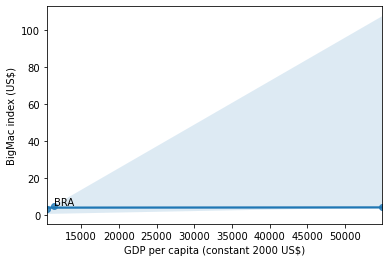

In [33]:
ax = sns.regplot(x="Value", y="dollar_price", data=merged_df)
ax.set_xlabel("GDP per capita (constant 2000 US$)")
ax.set_ylabel("BigMac index (US$)")

# Label the country code for those who demonstrate extreme BigMac index
for row in merged_df.itertuples():
    if row.dollar_price >= 5 or row.dollar_price <= 2:
        ax.text(row.Value,row.dollar_price+0.1,row.country)

plt.show()

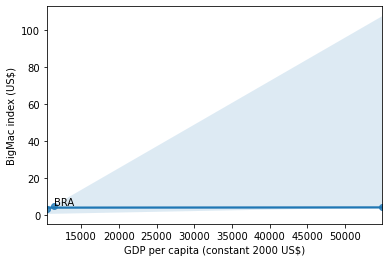

In [34]:
ax = sns.regplot(x="Value", y="dollar_price", data=merged_df)
ax.set_xlabel("GDP per capita (constant 2000 US$)")
ax.set_ylabel("BigMac index (US$)")

# Label the country code for those who demonstrate extreme BigMac index
for row in merged_df.itertuples():
    if row.dollar_price >= 5 or row.dollar_price <= 2:
        ax.text(row.Value,row.dollar_price+0.1,row.country)

plt.show()

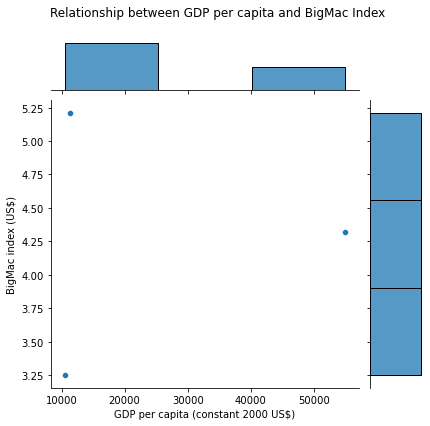

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt


# seaborn.jointplot() returns a seaborn.JointGrid object
g = sns.jointplot(x="Value", y="dollar_price", data=merged_df)

# Provide custom axes labels through accessing the underlying axes object
# We can get matplotlib.axes.Axes of the scatter plot by calling g.ax_joint
g.ax_joint.set_xlabel("GDP per capita (constant 2000 US$)")
g.ax_joint.set_ylabel("BigMac index (US$)")

# Set the title and adjust the margin
g.fig.suptitle("Relationship between GDP per capita and BigMac Index")
g.fig.subplots_adjust(top=0.9)

plt.show()

In [36]:
d = {'Date': ['2015-01-31', '2015-01-31', '2015-01-31'], 'Open': [28.00, 5.30,13.50], 'High': [3.252033, 4.318705,5.206827], 
     'Company': ['ARG', 'AUS','BRA'], 'Close': [28.00, 5.30,13.50],'Low': [28.00, 5.30,13.50], 'Volume': [10490.019568, 54941.911458, 11322.146680],
    'Close_change': [0,-0.001119,0.005085]}
stock_df = pd.DataFrame(data=d)
stock_df.head()




,Date,Open,High,Company,Close,Low,Volume,Close_change
0,2015-01-31,28.0,3.252033,ARG,28.0,28.0,10490.019568,0.000000
1,2015-01-31,5.3,4.318705,AUS,5.3,5.3,54941.911458,-0.001119
2,2015-01-31,13.5,5.206827,BRA,13.5,13.5,11322.146680,0.005085


In [37]:
stock_change = stock_df.pivot(index='Date', columns='Company', values='Close_change')
stock_change = stock_change.loc["2015-01-01":"2017-06-30"]
stock_change.head()

Company,ARG,AUS,BRA
Date,,,
2015-01-31,0.0,-0.001119,0.005085


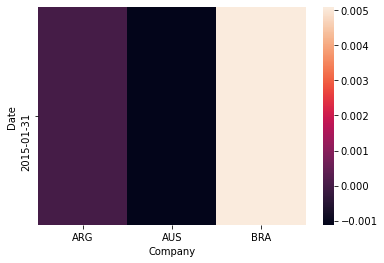

In [38]:
ax = sns.heatmap(stock_change)

plt.show()

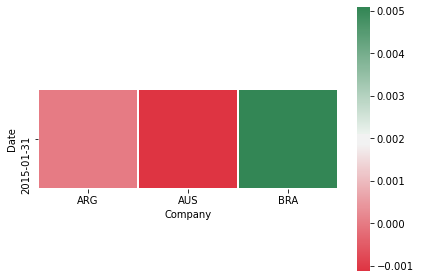

In [39]:
# Create a new red-green color map using the husl color system
# h_neg and h_pos determines the hue of the extents of the color map.
# s determines the color saturation
# l determines the lightness
# sep determines the width of center point
# In addition, we need to set as_cmap=True as the cmap paramter of sns.heatmap 
# expects matplotlib colormap object.
rdgn = sns.diverging_palette(h_neg=10, h_pos=140, s=80, l=50, sep=10, as_cmap=True)

# Change to square blocks (square=True), add a thin
# border (linewidths=.5), and change the color map
# to follow US stocks market convention (cmap="RdGn").
ax = sns.heatmap(stock_change, cmap=rdgn,
                 linewidths=.5, square=True)

plt.tight_layout()

plt.show()

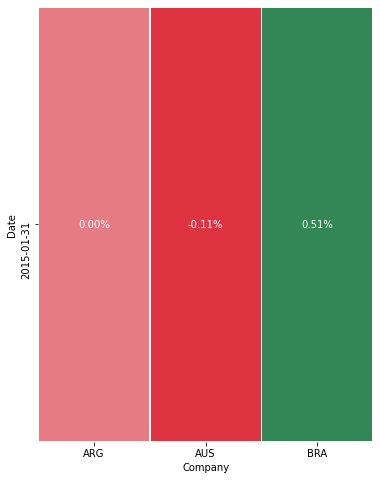

In [40]:
fig = plt.figure(figsize=(6,8))

# Set annot=True to overlay the values.
# We can also assign python format string to fmt. 
# For example ".2%" refers to percentage values with
# two decimal points.
ax = sns.heatmap(stock_change, cmap=rdgn,
                 annot=True, fmt=".2%",
                 linewidths=.5, cbar=False)

plt.show()

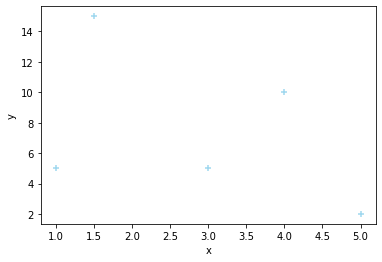

In [49]:

# Create dataframe
df = pd.DataFrame({
'x': [1, 1.5, 3, 4, 5],
'y': [5, 15, 5, 10, 2],
'group': ['A','other group','B','C','D']
})
 
sns.regplot(data=df, x="x", y="y", fit_reg=False, marker="+", color="skyblue")

plt.show()

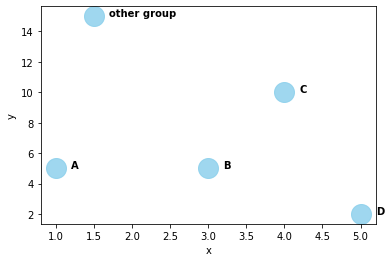

In [50]:
# basic plot
sns.regplot(data=df, x="x", y="y", fit_reg=False, marker="o", color="skyblue", scatter_kws={'s':400})
 
# add annotations one by one with a loop
for line in range(0,df.shape[0]):
     plt.text(df.x[line]+0.2, df.y[line], df.group[line], horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.show()